# Pythonでチップチューン音楽を作ろう



In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Audio

## sin波

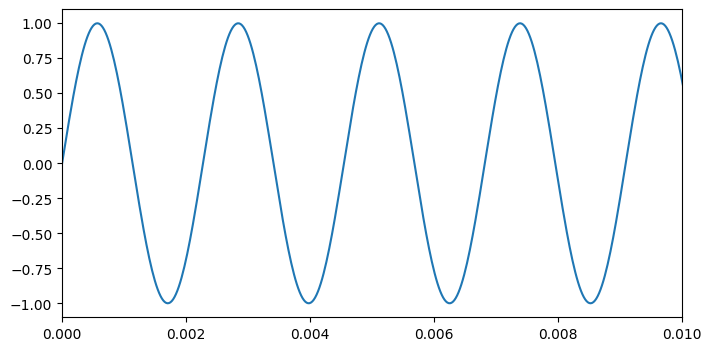

In [9]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = np.sin(2 * np.pi * freq * t)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

## 矩形波

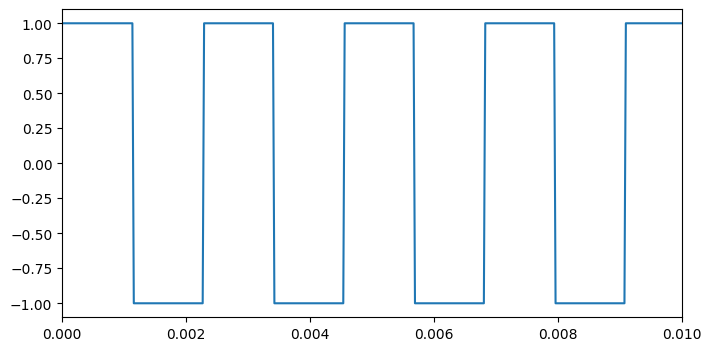

In [10]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = sp.signal.square(2 * np.pi * freq * t)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

## 三角波

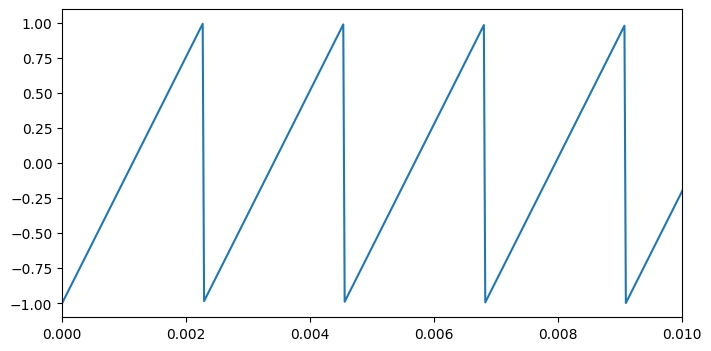

In [11]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = sp.signal.sawtooth(2 * np.pi * freq * t)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

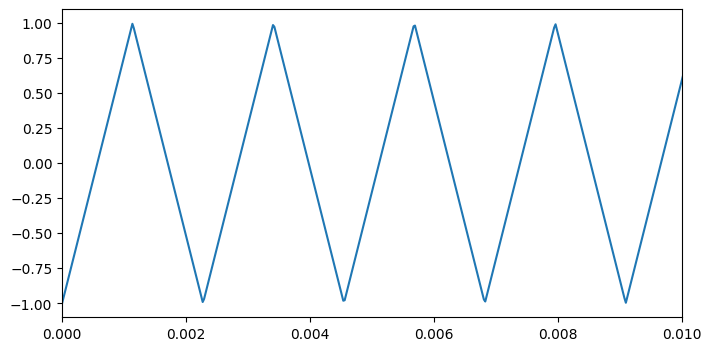

In [12]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = sp.signal.sawtooth(2 * np.pi * freq * t, width=0.5)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

## 音程

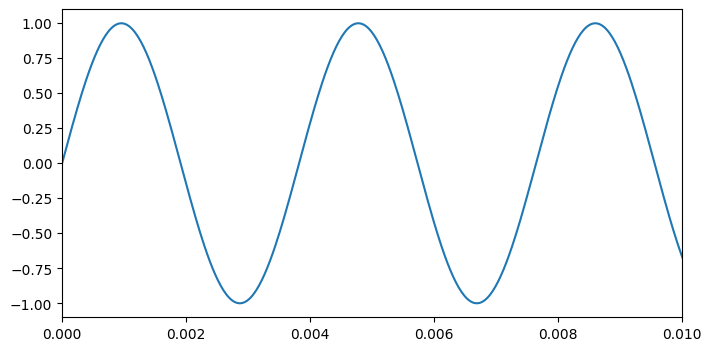

In [14]:
A4 = 440
A4_num = 69

sr, sec = 44100, 1

c4_num = 60
freq = A4 * 2 ** ((c4_num - A4_num) / 12)

t = np.arange(0, sec, 1/sr)
y = np.sin(2 * np.pi * freq * t)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)